### Course                    : Selected Topics in Computational Intelligence I
### Course Code          : COMP8038
### Lecturer Name       : Amalia Zahra, S.Kom., Ph. D.
### Lecturer Code        : D5990
### Class                       : LTY-1 

## Tugas Kelompok Ant Colony Optimization Algorithm Berlin52 Dataset

#### Kelompok 6:
#### Aldo Jonathan Handaka (2201736971)
#### Alim Raharjo (2201748164)
#### Edward (2201741971)	
#### Raffael Lucas Tatulus (2201742356)
#### Richard Geovani (2201734096)

### Read Dataset

In [1]:
import numpy as np
from numpy import inf
import matplotlib.pyplot as plt
locations = []
f = open("berlin52Aco.txt", "r+")
u = f
for line in u:
    line = line.split(" ", 1)[1]
    y = line.split()
    y[0] = float(y[0])
    y[1] = float(y[1])
    locations.append(y)
print(locations)

[[565.0, 575.0], [25.0, 185.0], [345.0, 750.0], [945.0, 685.0], [845.0, 655.0], [880.0, 660.0], [25.0, 230.0], [525.0, 1000.0], [580.0, 1175.0], [650.0, 1130.0], [1605.0, 620.0], [1220.0, 580.0], [1465.0, 200.0], [1530.0, 5.0], [845.0, 680.0], [725.0, 370.0], [145.0, 665.0], [415.0, 635.0], [510.0, 875.0], [560.0, 365.0], [300.0, 465.0], [520.0, 585.0], [480.0, 415.0], [835.0, 625.0], [975.0, 580.0], [1215.0, 245.0], [1320.0, 315.0], [1250.0, 400.0], [660.0, 180.0], [410.0, 250.0], [420.0, 555.0], [575.0, 665.0], [1150.0, 1160.0], [700.0, 580.0], [685.0, 595.0], [685.0, 610.0], [770.0, 610.0], [795.0, 645.0], [720.0, 635.0], [760.0, 650.0], [475.0, 960.0], [95.0, 260.0], [875.0, 920.0], [700.0, 500.0], [555.0, 815.0], [830.0, 485.0], [1170.0, 65.0], [830.0, 610.0], [605.0, 625.0], [595.0, 360.0], [1340.0, 725.0], [1740.0, 245.0]]


In [2]:
dist = np.zeros((52,52))
for i,city in enumerate(locations):
    for j,city2 in enumerate(locations): 
        dist[i][j] = np.linalg.norm(np.array(city)-np.array(city2))

d = dist

### Initialize City, Ants, Pheromone, Alpha, Beta

In [3]:
iteration = 1000
n_city = 52 
n_ants = 52
total_p = 1
pheromone_per_path = total_p/d
pheromone_per_path[pheromone_per_path == inf] = 0
print(pheromone_per_path)
alpha = 0.85 
beta = 1.7
ini_p = np.ones((n_ants, n_city))
rute = np.ones((n_ants, n_city+1))
run = 0
bestp = []

[[0.         0.00150126 0.00355728 ... 0.00460653 0.00126681 0.00081936]
 [0.00150126 0.         0.00154006 ... 0.00167712 0.00070345 0.00058273]
 [0.00355728 0.00154006 0.         ... 0.00215866 0.00100471 0.00067404]
 ...
 [0.00460653 0.00167712 0.00215866 ... 0.         0.00120539 0.00086899]
 [0.00126681 0.00070345 0.00100471 ... 0.00120539 0.         0.00160046]
 [0.00081936 0.00058273 0.00067404 ... 0.00086899 0.00160046 0.        ]]


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


### Ant Colony Optimization Result for berlin52 Dataset

route of all the ants at the end :
[[ 1. 22. 32. ... 50. 18.  1.]
 [ 1. 22. 32. ... 50. 18.  1.]
 [ 1. 22. 32. ... 50. 18.  1.]
 ...
 [ 1. 22. 32. ... 50. 18.  1.]
 [ 1. 22. 32. ... 50. 18.  1.]
 [ 1. 22. 32. ... 50. 18.  1.]]

best path : [ 1. 22. 32. 49. 36. 39. 40. 37. 38. 24. 48.  5. 15.  6.  4. 25. 12. 28.
 27. 26. 47. 14. 13. 52. 11. 51. 33. 43. 10.  9.  8. 41. 19. 45.  3. 17.
 42.  7.  2. 30. 29. 16. 46. 44. 34. 35. 31. 21. 23. 20. 50. 18.  1.]
cost of the best path 8253.554944214035


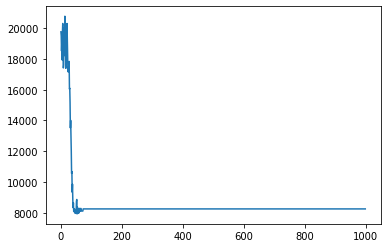

In [4]:
while run < 1:
    m = n_ants
    n = n_city
    pheromne = ini_p
    e = .2         
    alpha = 1    
    beta = 1.8 
    visibility = pheromone_per_path
    for ite in range(iteration):
        rute[:,0] = 1         
        for i in range(m):
            temp_visibility = np.array(visibility)        
            for j in range(n-1):
                #print(rute)
                combine_feature = np.zeros(52)     
                cum_prob = np.zeros(52)            
                cur_loc = int(rute[i,j]-1)        
    #             print("cur_loc",cur_loc)
                temp_visibility[:,cur_loc] = 0     
    #             print(temp_visibility)
    #             print("pheromne",pheromne[cur_loc,:])
                p_feature = np.power(pheromne[cur_loc,:],beta)        
                v_feature = np.power(temp_visibility[cur_loc,:],alpha)  
                p_feature = p_feature[:,np.newaxis]                     
                v_feature = v_feature[:,np.newaxis]                     
                combine_feature = np.multiply(p_feature,v_feature)     
                total = np.sum(combine_feature)                        
                probs = combine_feature/total   
                cum_prob = np.cumsum(probs)    
                #print(cum_prob)
                r = np.random.random_sample()   
                #print(r)
                city = np.nonzero(cum_prob>r)[0][0]+1       
                #print(city)
                rute[i,j+1] = city              
            left = list(set([i for i in range(1,n+1)])-set(rute[i,:-2]))[0]   
            rute[i,-2] = left                   
        rute_opt = np.array(rute)              
        dist_cost = np.zeros((m,1)) 
        for i in range(m):
            s = 0
            for j in range(n-1):
                s = s + d[int(rute_opt[i,j])-1,int(rute_opt[i,j+1])-1]  
            dist_cost[i]=s                      
        dist_min_loc = np.argmin(dist_cost)             
        dist_min_cost = dist_cost[dist_min_loc]        
        best_route = rute[dist_min_loc,:]               
        pheromne = (1-e)*pheromne                      
        for i in range(m):
            for j in range(n-1):
                dt = 1/dist_cost[i]
                pheromne[int(rute_opt[i,j])-1,int(rute_opt[i,j+1])-1] = pheromne[int(rute_opt[i,j])-1,int(rute_opt[i,j+1])-1] + dt   
        best_dist = int(dist_min_cost[0]) + d[int(best_route[-2])-1,0]
        bestp.append(best_dist)
    print('route of all the ants at the end :')
    print(rute_opt)
    print()
    print('best path :',best_route)
    print('cost of the best path',int(dist_min_cost[0]) + d[int(best_route[-2])-1,0])
    plt.plot(bestp)
    f = open("berlin_52_E.txt", "a")
    f.write("Run {}/{} Length of best path: {}\n".format(run, 10,int(dist_min_cost[0]) + d[int(best_route[-2])-1,0]))
    run +=1